# CNN

## Convolutional Neural Network

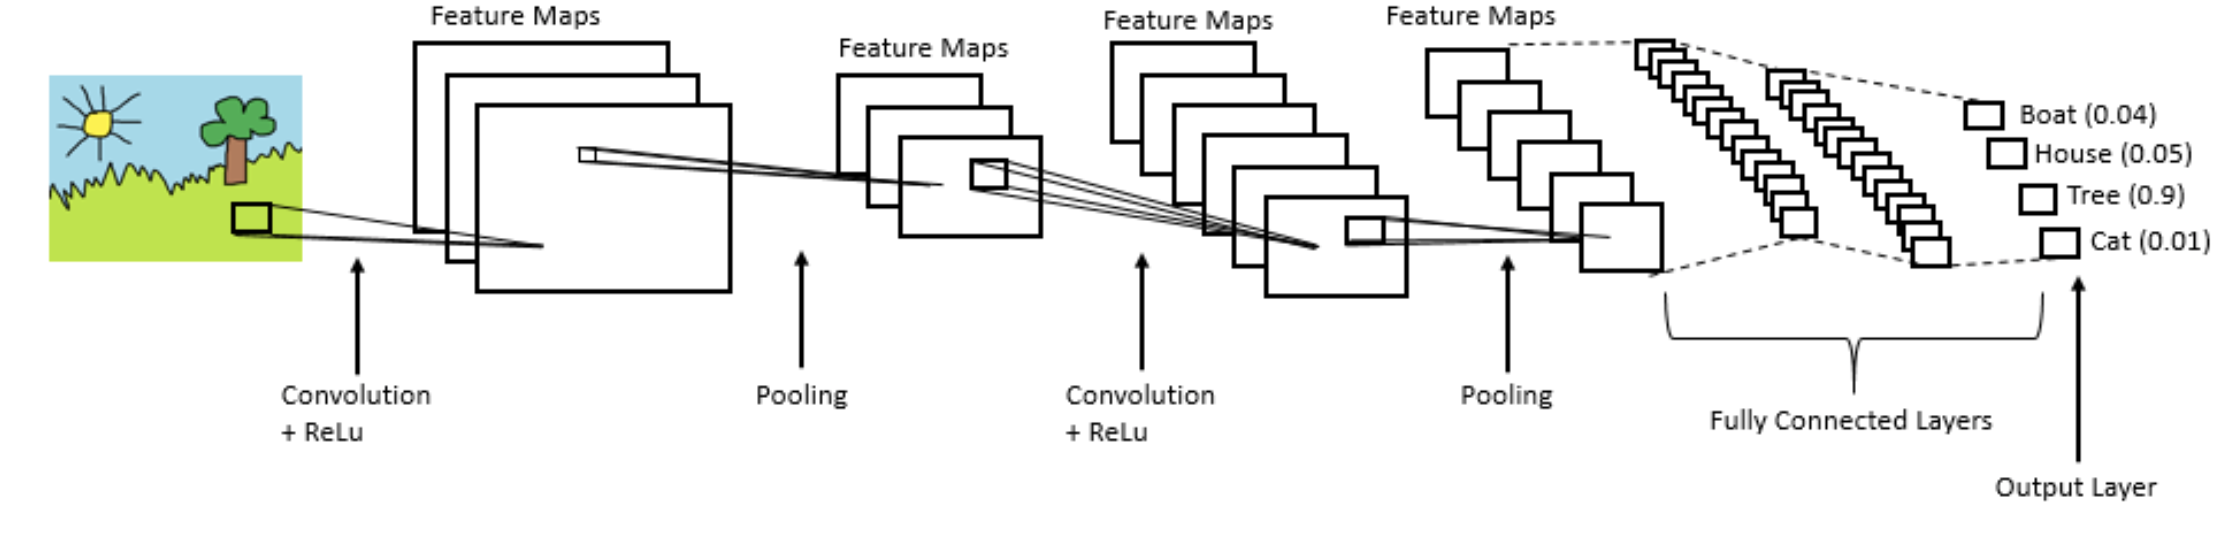

## Why CNN?
ANN have disadvantages:
- require linear input - too big for average size images
- each hidden neuron is connected with every one from the previous layer - too many weights and complicated calculations

CNN idea based on human vision: one neuron in the visual cortex has a small local receptive field and a preference of shapes/stimuli to react. All neurons together build the whole visual field.

## Features

### Input Layer
2- or 3-dimensional - more natural representation of the image

!["Explanation of image"](../images/cnnimages/8-gif.gif "pixels")

### Convolutional Layer
Connects one hidden neuron with a small part of the previous layer neurons. <br>
A the small receptive field, called __convolution kernel__ is used as a _weight_ and a _filter_

!["Explanation of image"](../images/cnnimages/convolutional.png "pixels")

#### Feature Maps
Each convolutional layer extracts specific features: feature maps. Each pixel of each feature map is an output of the convolutional layer.
Here are some examples.

!["Explanation of image"](../images/cnnimages/filters.png "pixels")

The filter on the left might activate strongest when it encounters a horizontal line; the one in the middle for a vertical line.

In the convolution layer, the filters slide across the input, row by row, and act when they detect their shape.<br>
Sliding filters are how the CNN can learn meaningful features and later locate them in any part of the image.

!["Explanation of image"](../images/cnnimages/kernels.gif "pixels")

#### Feature Extraction

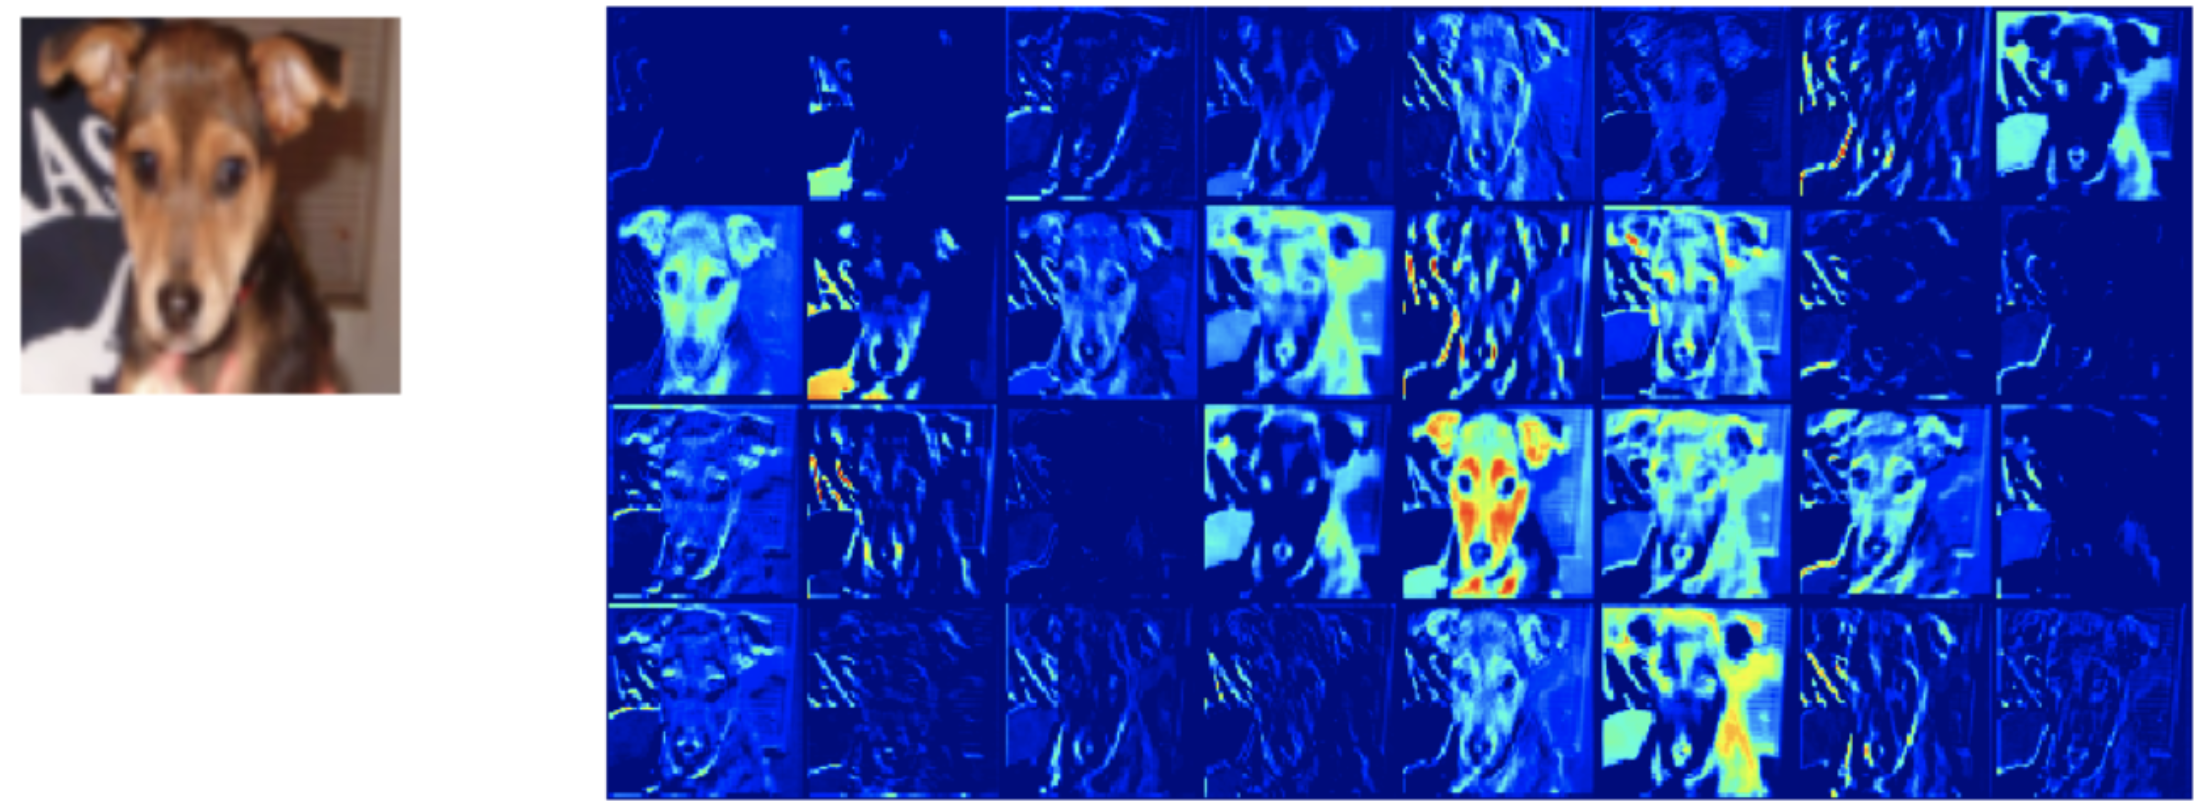

#### Kernels

This is an illustration of a kernel:
!["Explanation of image"](../images/cnnimages/kernel.gif "pixels")

__Strides__: the number of transitional positions - 1 on the image above <br>
__Padding__: adding pixels to the sides, needed for processing the edge pixels - 1 on the image below <br>


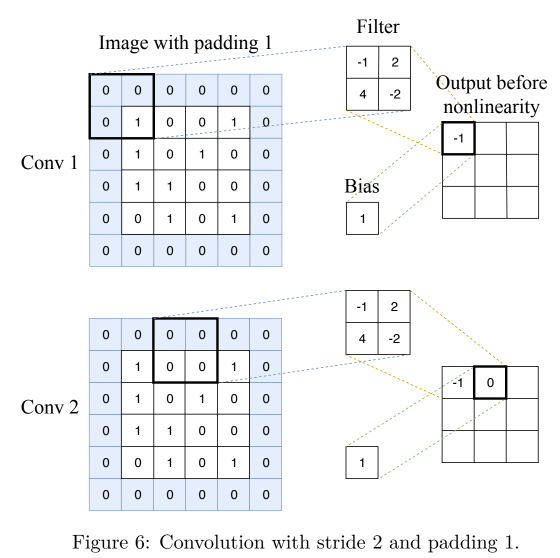

### Pooling Layer
Used as _activation function_ and for reducing the size of the layer

This is an illustration of a max pooling: four pixels are replaced by the one, which has the biggest value.
!["Explanation of image"](../images/cnnimages/pooling.gif "Pooling")

### Fully Connected Layers and Dropouts

To avoid overfitting, various models of networks can be used, but it is expensive. Alternatively, a single model can be used to simulate large number of different networks by _randomly dropping out nodes_ during training. This is called __dropout__ and used as effective regularization method for reducing the overfitting and improve the errors. It can be implemented at the __fully connected__ layers.
More about dropouts: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

### Output Layer
A classic, fully connected layer is used as __output layer__.

# Exercise: Deep Learning with TensorFlow and Keras

#### Task
Create a neural network to recognize a handwritten digit
#### Data
Use MNIST dataset that contains about 55000 images of handwritten digits, each represented in a matrix 28 x 28 of pixels, 784 in total. Each pixel has a value between 0 and 1 (see the example below)
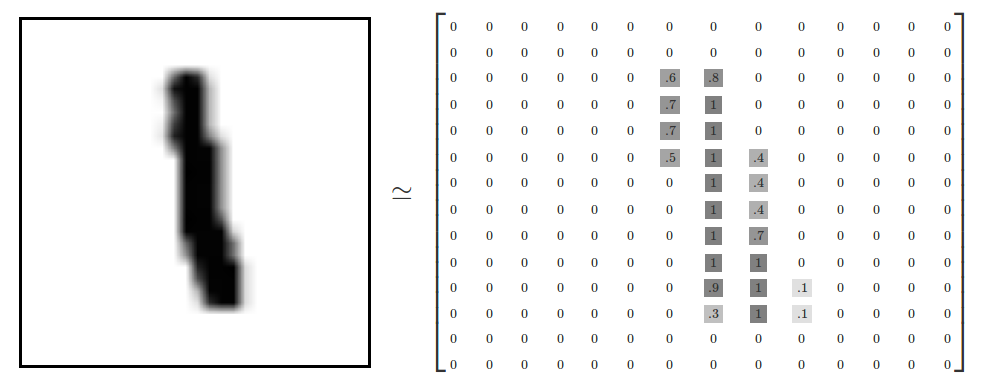
#### Solution
Create a neural network with input layer, three hidden layers, and an output layer.
Use activation function to fire neurons.
Use cost function to estimate the error.
Use optimizer function to minimize the error.
#### Learning rate
Defines how fast the network learns.
The lower the value for learning rate, the slower learning, and the more likely getting better results.
The higher the learning rate, the quicker learning, giving faster training times, but may suffer on the results. 
#### Epoch
Feeding the network is called feed-forward.
Adjusting the weights backwards is called back propagation.
Feed-forward and back-propagation go in cycles.
A cycle is called epoch.

After each epoch run on the train data, hopefully, the weights are tunned better, the error is lower, and the accuracy is highet.
After all epochs, we can test the model using the test set.

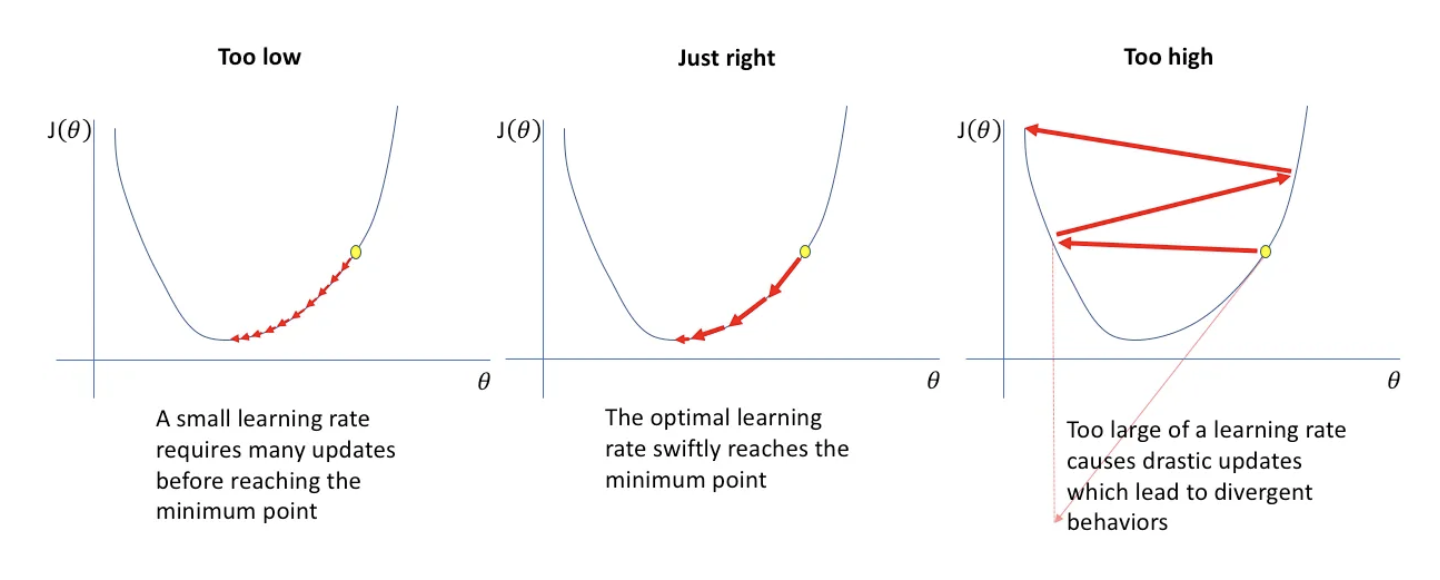

                                    Learning Rate

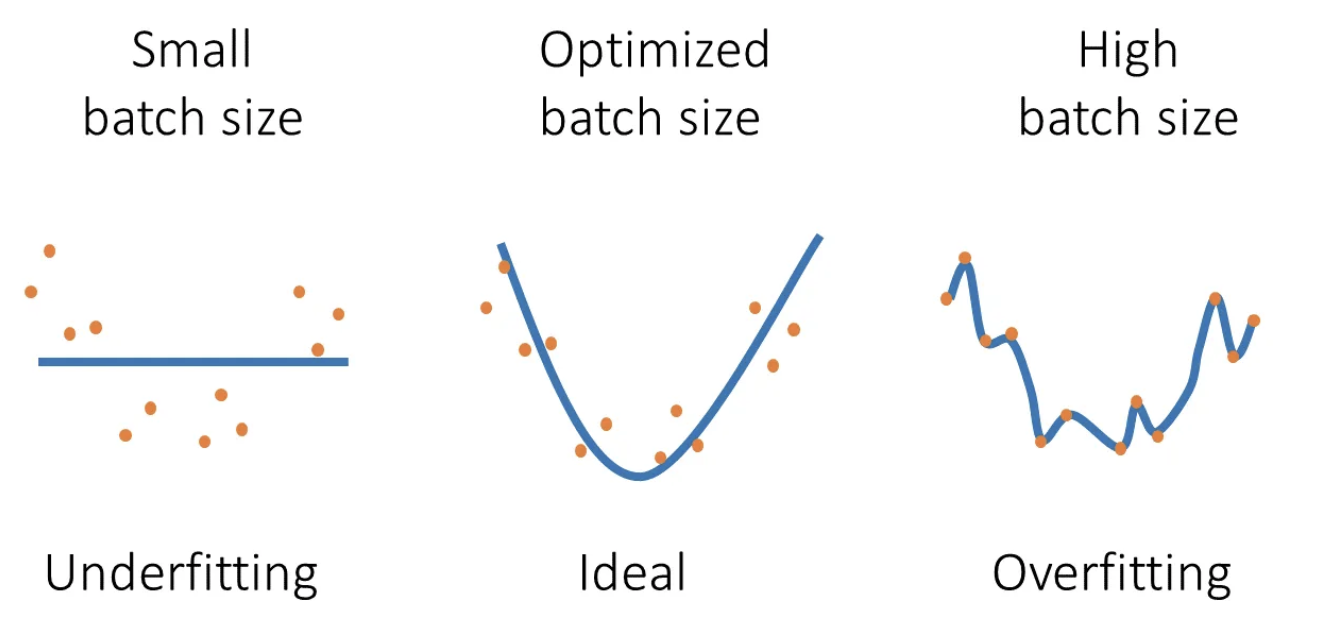

                                    Batch Size

#### Algorithm
input layer >> weights >> hidden layer 1 >> activation function >> hidden layer 2 >> activation function >> weights >> output layer
compare (output, expected output) with a cost/lost function
optimizer -> minimize the error
back propagatoion
epochs

## Platform

In [ ]:
import os
os.getcwd()

import sys
sys.version

!python -V

!pip3 install tensorflow

In [ ]:
!pip3 install keras

In [ ]:
import tensorflow as tf
import keras

In [ ]:
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
# TF Version
tf.__version__

## Data Ingestion

Load the _mnist_ dataset from Keras' sample datasets

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
train, test = mnist.load_data()

In [ ]:
x_train, y_train = train
x_test, y_test = test

In [ ]:
print ('x_train data: ' + str(x_train.shape))
print ('y_train data: ' + str(y_train.shape))

In [ ]:
print ('x_test data: ' + str(x_test.shape))
print ('y_test data: ' + str(y_test.shape))

## Data Exploration and Engineering

In [ ]:
# See the data format
x_train[10]

### Check for NaN

In [ ]:
np.isnan(x_train).sum()

In [ ]:
np.isnan(x_test).any()

In [ ]:
# sns.countplot(y_train)

### Reshape Images

In [ ]:
x_train.shape

In [ ]:
# Transform it to  
input_shape = (28, 28, 1)
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

### Normalize Images
Normalize the pixels' values, dividing eaach of them by the max value of 255.

In [ ]:
x_train = x_train / 255.0

In [ ]:
x_test = x_test / 255.0

### Visualize Data

In [ ]:
# Test plot to see a random images
def display_digit(num, size):
    image = x_train[num].reshape([size,size])
    label = y_train[num]
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

randnum = ran.randint(0, 59000)
display_digit(randnum, 28)

### Encode the Labels

#### One-hot Encoding
One hot encoding is a process by which categorical variables are converted into a set of binary digits, where
the position of '1' determines the category. We will use it for representing the labels.

one_hot=True means

0 = [1,0,0,0,0,0,0,0,0] <br>
1 = [0,1,0,0,0,0,0,0,0] <br>
2 = [0,0,1,0,0,0,0,0,0] <br>
3 = [0,0,0,1,0,0,0,0,0] <br>
...

In [ ]:
y_train = y_train.astype(np.int32)

In [ ]:
y_test = y_test.astype(np.int32)

In [ ]:
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [ ]:
y_train[10]

## ANN Model

### Hyperparameters

In [ ]:
n = x_train.shape[0]
n

In [ ]:
# Split in mini-batches (partitions) to be input together
batch_size = 256

# Number of batches
m = int(n/batch_size)
m

In [ ]:
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_train = ds_train.shuffle(5000).batch(batch_size)

In [ ]:
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_test = ds_test.shuffle(5000).batch(batch_size)

In [ ]:
# Define the topology of the neural network
# Number of classes in output layer
classes = 10

# Number of epochs
epochs = 10

# Learning rate
learning_rate = 0.001

### Build the TF computation graph

In [ ]:
# y = {X} * {W} + b
# relu is an activation function for each node (see the graph below)
# softmax() is an alternative activation function, applied to all output nodes

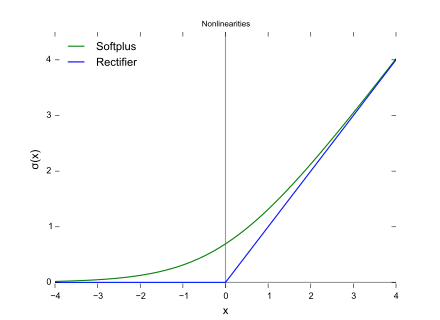


                                               The activation functions

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [ ]:
model = keras.Sequential(
    [    
        # add pads on left and right
        Conv2D(32, (5,5), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(32, (5,5), activation='relu', padding='same'),
        MaxPool2D(strides=(2,2)),
        Dropout(0.25),
        
        Conv2D(64, (3,3), activation='relu'),
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(strides=(2,2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        # Dense(classes, activation='sigmoid')
        Dense(classes, activation='softmax')
    ]
)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Start feed forward
# 90% for train, 10% for validation
history = model.fit(x_train, y_train, batch_size=batch_size, validation_split=0.1, epochs=epochs)


In [ ]:
# history = model.fit(ds_train, validation_data=ds_test, epochs=epochs)

## Accuracy Estimation

### With Train Data

In [ ]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss          = history.history['loss']
val_loss      = history.history['val_loss']

In [ ]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.plot(loss)
plt.plot(val_loss)

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"])
print(history.history.keys())
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[0].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['loss'], color='b', label="Training Loss")
ax[1].plot(history.history['val_loss'], color='r', label="Validation Loss", axes =ax[1])
legend = ax[1].legend(loc='best')

### With Test Data

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
test_acc

In [ ]:
test_loss

### Confusion Matrix

In [ ]:
# Predict the values from the testing dataset
y_predicted = model.predict(x_test)
y_expected = np.argmax(y_test, axis = 1)

# Convert predictions classes to one hot vectors 
predicted_classes = np.argmax(y_predicted, axis = 1) 

In [ ]:
predicted_classes

In [ ]:
# compute the confusion matrix
cmat = tf.math.confusion_matrix(y_expected, predicted_classes) 

In [ ]:
# X-predicted
# Y-expected
plt.figure(figsize=(10, 8))
sns.heatmap(cmat, annot=True, fmt='g')

### Test with our own data

In [ ]:
# Test plot to see a random images
def display_digit(num, size):
    image = x_train[num].reshape([size,size])
    label = y_train[num]
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

randnum = ran.randint(0, 59000)
display_digit(randnum, 28)

In [ ]:
# Try a random image from the database
def atest(k):
    img = x_train[k]
    lab = y_train[k]

    plt.imshow(img, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()

    prediction = model.predict(x_train[k].reshape(1, x_train.shape[1], x_train.shape[2], 1))                                                     
    predicted_class = np.argmax(prediction, axis = 1) 
    
    return predicted_class, lab


In [ ]:
k = ran.randint(0, 59999) 
predicted_class, lab = atest(k)
print('Neural Network predicted', predicted_class)
print('Real label is:', np.argmax(lab))

### Task 1: Add some image files with digits and use them to test your deep learning model

### Task 2: Train and test a deep learning model of another dataset, e.g. Fashion-MNIST

## OLA 1: CNN Classification Task: Cat or Dog?

!["Explanation of data"](../images/cnnimages/catordog.gif "CatorDog")